In [142]:
#Pandas se relaciona con tablas llamadas dataframe
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#        s=pd.Series(data,index=index)
#Una serie es unidimensional (una sola columna con varias filas), cuando tiene dos columnas, automáticamente se convierte en un dataframe
s=pd.Series((5,3,5,2)) # Como no tiene índices, se ponen los números automáticamente
c=pd.Series(np.random.randn(5),index=['a','b','c','d','e']) #Las letras son los índices
print(c)
# print(s)
# print(s.index)
# print(c.index)
# dic={"b":1,"a":0,"c":2}
# s1=pd.Series(dic)
# s2=pd.Series(dic,index=['a','b','c','d']) # No respeta el orden del diccionario, almacena según el orden del index, y lo que no tiene valor da NaN
# print(s1)
# print(s2)
# f=pd.Series(5,index=np.arange(10))
# print(f)
# print(f[-1:])

In [ ]:
print(c.median())
print(c[c>c.median()])
print(c[[4,3,1]])

In [ ]:
# print(c.array)
# print(s.to_numpy)
print(c[1:]+c[:-1]) # Como se quita el primer índice a en c[1:] y se quitó el índice e en c[:-1], el índice a y el e quedan con NaN
j=c[1:]+c[:-1]
h=j.dropna() # Para quitar los NaN
print(h)
# print(np.exp(c))

In [126]:
current=os.getcwd()
file=glob.glob(current+'/*.csv')
# print(current)
# print(file)
alzhaimer=pd.read_csv(file[0],sep=';')
alzhaimer_copy=alzhaimer.copy()
MMSE=pd.read_csv(file[1],sep=';')
MMSE_copy=MMSE.copy()
# mmse=pd.read_csv(r'c:\\Users\\Pablo\\Informática ll\\Unidad 2\\MMSE.csv',sep=';')
# print(MMSE)
# print(MMSE.size)
# print(MMSE.shape)
# print(MMSE.columns)
# print(MMSE['Sexo'].describe())
# print(MMSE.describe())
# print(MMSE.describe().T)

In [ ]:
alzhaimer.describe()
MMSE.describe()
# alzhaimer.loc[0] # Información de la fila pedida

In [127]:
alzhaimer_copy=alzhaimer_copy.reset_index()
# print(alzhaimer_copy)
'Para eliminar columnas'
# alzhaimer_copy=alzhaimer_copy.drop(['index'],axis=1) 
# del alzhaimer_copy['index']
'Para borrar una fila'
alzhaimer_copy=alzhaimer_copy.drop([4],axis=0)
# del alzhaimer_copy[5]
print(alzhaimer_copy)

     index    Group Sexo  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0        0  Control    F   87    14    2    27  0.0  1987  0.696  0.883
1        1  Control    F   88    14    2    30  0.0  2004  0.681  0.876
2        2      DCL    F   75    12    3    23  0.5  1678  0.736  1.046
3        3      DCL    F   76    12    2    28  0.5  1738  0.713  1.010
5        5  Control    M   88    18    3    28  0.0  1815  0.710  1.444
..     ...      ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
368    368      DCL    F   82    16    1    28  0.5  1693  0.694  1.037
369    369      DCL    F   86    16    1    26  0.5  1688  0.675  1.040
370    370  Control    M   61    13    2    30  0.0  1319  0.801  1.331
371    371  Control    M   63    13    2    30  0.0  1327  0.796  1.323
372    372  Control    M   65    13    2    30  0.0  1333  0.801  1.317

[372 rows x 11 columns]


In [ ]:
alzhaimer_copy=alzhaimer_copy.assign(falseIndex=np.random.randn(372)) #372 porque borramos una fila arriba
# alzhaimer_copy=alzhaimer_copy

In [ ]:
alzhaimer_edad_70=alzhaimer[(alzhaimer['Age']>=70)]
# print(alzhaimer_edad_70) # quedan 308 filas porque el resto son manores de 70
# print(alzhaimer_edad_70.shape)
# alzhaimer_educ_14=alzhaimer[(alzhaimer['Educ']<14)]
# print(alzhaimer_educ_14)
# print(alzhaimer_educ_14.shape)
alzhaimer_filtro=alzhaimer_edad_70[(alzhaimer_edad_70['Educ']<14)] # Se tiene que aplicar un filtro al filtro, no se puede filtrar dos cosas en una sola línea
print(alzhaimer_filtro)

Text(0.5, 1.0, 'Gráfico De Barras')

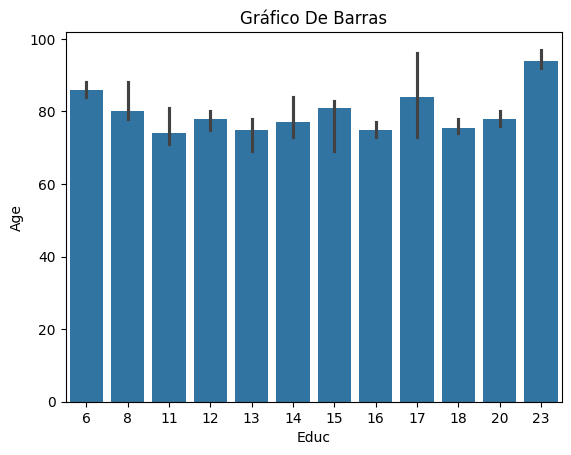

In [143]:
sns.barplot(x='Educ',y='Age', data=alzhaimer,estimator=np.median)
plt.title("Gráfico De Barras")

<AxesSubplot:xlabel='Educ', ylabel='Count'>

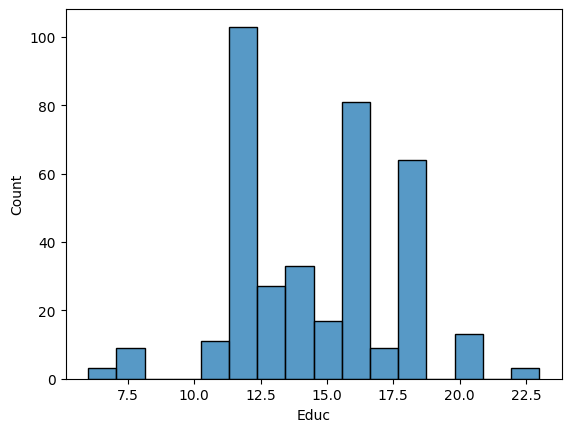

In [146]:
# sns.histplot(alzhaimer['Age'])
# sns.histplot(alzhaimer['Educ'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

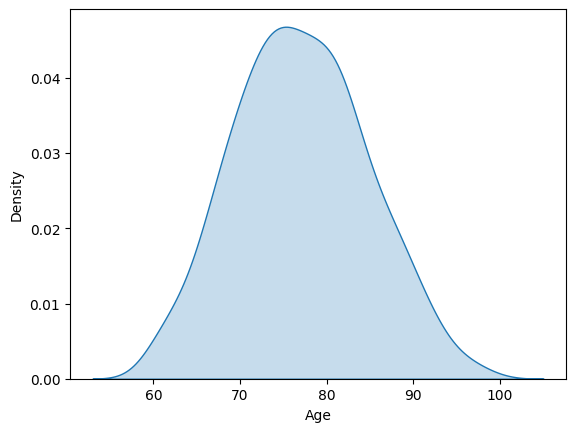

In [155]:
sns.kdeplot(data=alzhaimer['Age'],fill=True)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_12744\2872548485.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=alzhaimer, x='Group', y='Age',palette="rocket")


<AxesSubplot:xlabel='Group', ylabel='Age'>

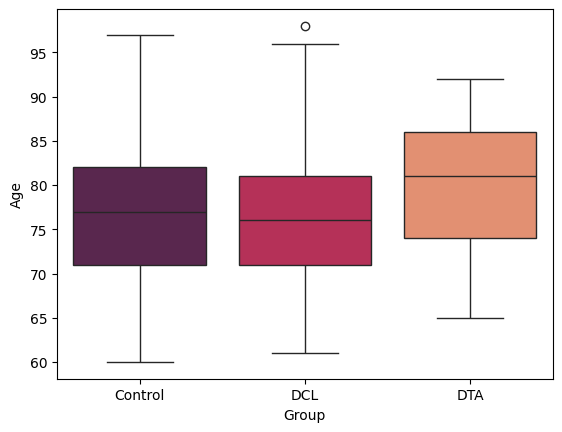

In [153]:
sns.boxplot(data=alzhaimer, x='Group', y='Age',palette="rocket")


C:\Users\Pablo\AppData\Local\Temp\ipykernel_12744\3477665129.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=alzhaimer,x='eTIV',y='Group',palette='YlOrBr')


<AxesSubplot:xlabel='eTIV', ylabel='Group'>

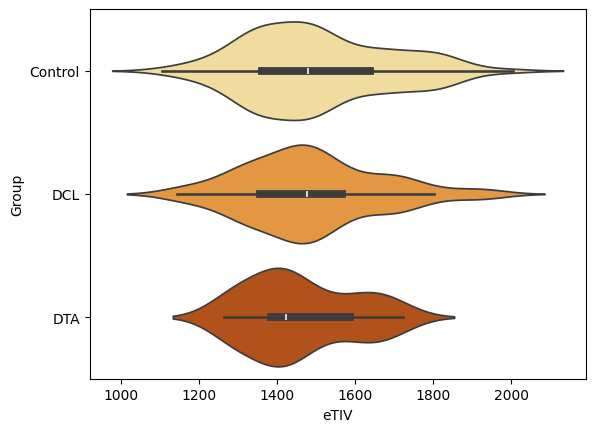

In [159]:
sns.violinplot(data=alzhaimer,x='eTIV',y='Group',palette='YlOrBr')

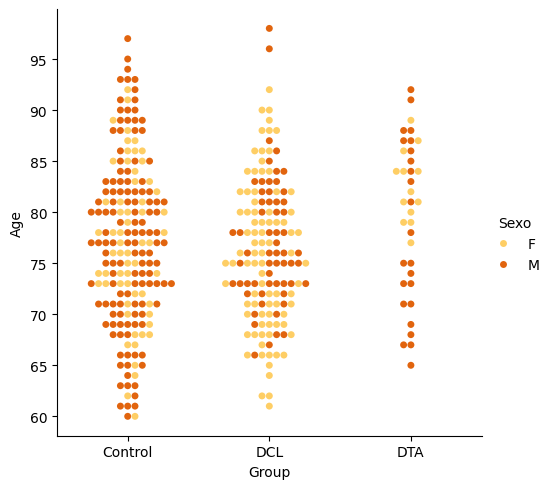

In [162]:
sns.catplot(data=alzhaimer,x='Group',y='Age',hue='Sexo',kind='swarm', palette='YlOrBr')